# Breast Cancer

* In this problem we need to see if we can predict if a person will alive or dead with Breast Cancer, we don't have a big database, our data date has 4024 values and 16 columns, here we will use the "Breast_Cancer.csv" database that has been made available for use , below you will see an analysis of the data, the processing of that data, class balancing, and the use of machine learning classification models to achieve our goal

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
os.chdir(r"D:\Practice Data Sets")
os.listdir()

['.jovianrc',
 'Breast_Cancer.csv',
 'creditcard.csv',
 'creditcard.csv.zip',
 'DontGetKicked',
 'DontGetKicked.zip',
 'Petrol Dataset June 20 2022',
 'rbi_payment_data_as_on_aug_2019.csv',
 'RBI_RTGS_NEFT',
 'Titanic Dataset-Machine Learning Model',
 'voice.csv',
 'voice.csv.zip',
 'Wireless Charger.py',
 'world-population-by-country-2020',
 'zollege.csv',
 'zollege_Colleges.ipynb']

In [3]:
df = pd.read_csv("Breast_Cancer.csv")
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [4]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.dtypes

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
Status                    object
dtype: object

# Data Analysis:

* Verifying the correlation between our variables.
* Checking the correlation between our variables, here we can see that we don't have a strong correlation between the variabels.

<AxesSubplot:>

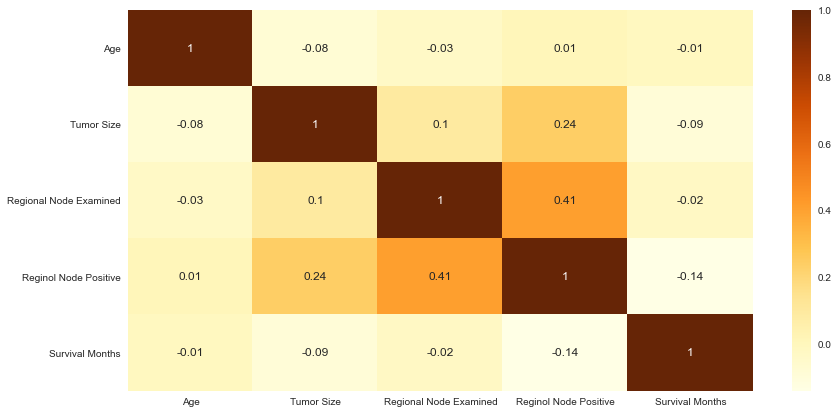

In [7]:
correlation = df.corr().round(2)
plt.figure(figsize=(14,7))
sns.heatmap(correlation,annot=True, cmap='YlOrBr')

# "Categorical Variables"

* Looking at our variable "Race" we can see that we have more white people, most people in our database are married, when we look at T-Stage we have more concentration on T1 and T2 stage, when we look at N Stage we have more concentration in N1, looking at our "differentiate" variable we can see that most of them are moderately differentiated, most of them are Regional, with Estrogen and Progesterone Positive and when we look at our target variable we can see that we have more people alive than dead.

<ipython-input-8-9aa346c6719a>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(6,2,9)


<AxesSubplot:xlabel='Status', ylabel='count'>

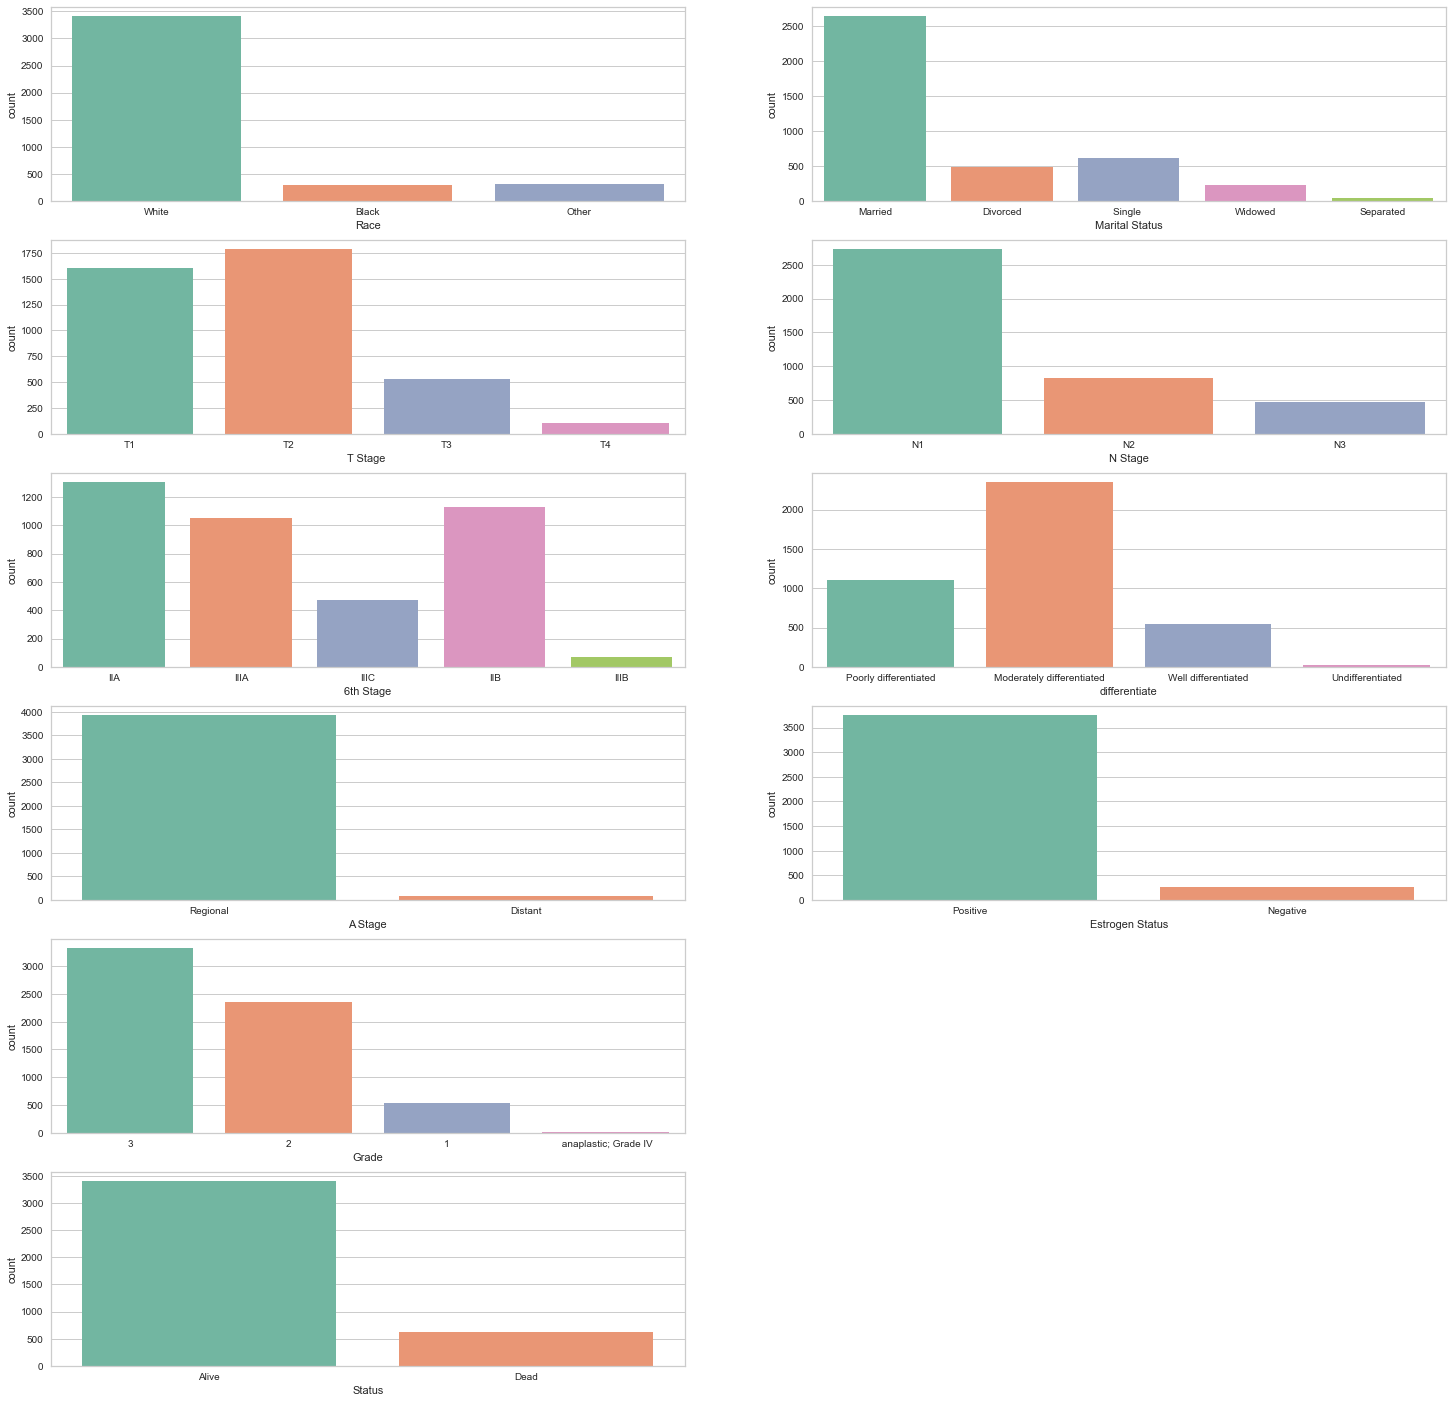

In [8]:
plt.figure(figsize = (25,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Race', palette='Set2', data = df)

plt.subplot(6,2,2)
sns.countplot(x = 'Marital Status', palette='Set2', data = df)

plt.subplot(6,2,3)
sns.countplot(x = 'T Stage ', palette='Set2', data = df)

plt.subplot(6,2,4)
sns.countplot(x = 'N Stage', palette='Set2', data = df)

plt.subplot(6,2,5)
sns.countplot(x = '6th Stage', palette='Set2', data = df)

plt.subplot(6,2,6)
sns.countplot(x = 'differentiate', palette='Set2', data = df)

plt.subplot(6,2,7)
sns.countplot(x = 'A Stage', palette='Set2', data = df)

plt.subplot(6,2,8)
sns.countplot(x = 'Estrogen Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Progesterone Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Grade', palette='Set2', data = df)

plt.subplot(6,2,11)
sns.countplot(x = 'Status', palette='Set2', data = df)

In [9]:
df['Race'].value_counts()

White    3413
Other     320
Black     291
Name: Race, dtype: int64

In [10]:
df['Marital Status'].value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital Status, dtype: int64

In [11]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [12]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [13]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [14]:
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

In [15]:
df['A Stage'].value_counts()

Regional    3932
Distant       92
Name: A Stage, dtype: int64

In [16]:
df['Estrogen Status'].value_counts()

Positive    3755
Negative     269
Name: Estrogen Status, dtype: int64

In [17]:
df['Progesterone Status'].value_counts()

Positive    3326
Negative     698
Name: Progesterone Status, dtype: int64

In [18]:
df['Grade'].value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [19]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

# "Continuous Variables"

* Looking at our continuous variables we can see that we have more elderly people in our base, we have a peak at 50-55-60 years old, when we look at the Regional Node Examined we can see that our top is around 15 and that most of our data is within 0-20, when we look at the Regionol Node Positive variable we can see pretty much the same behavior as the Regional Node Examined, most of the data is between 0-10 and the peak at 2, when we look at the variable Tumor Size we can see that we have the peak at 20 and that most of the data are at 15-25, when we look at the Survival Months variable we can see that the smaller the value of the variable the less values we have, the vast majority are between 60 and 100.

C:\Users\Shubham\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survival Months'>

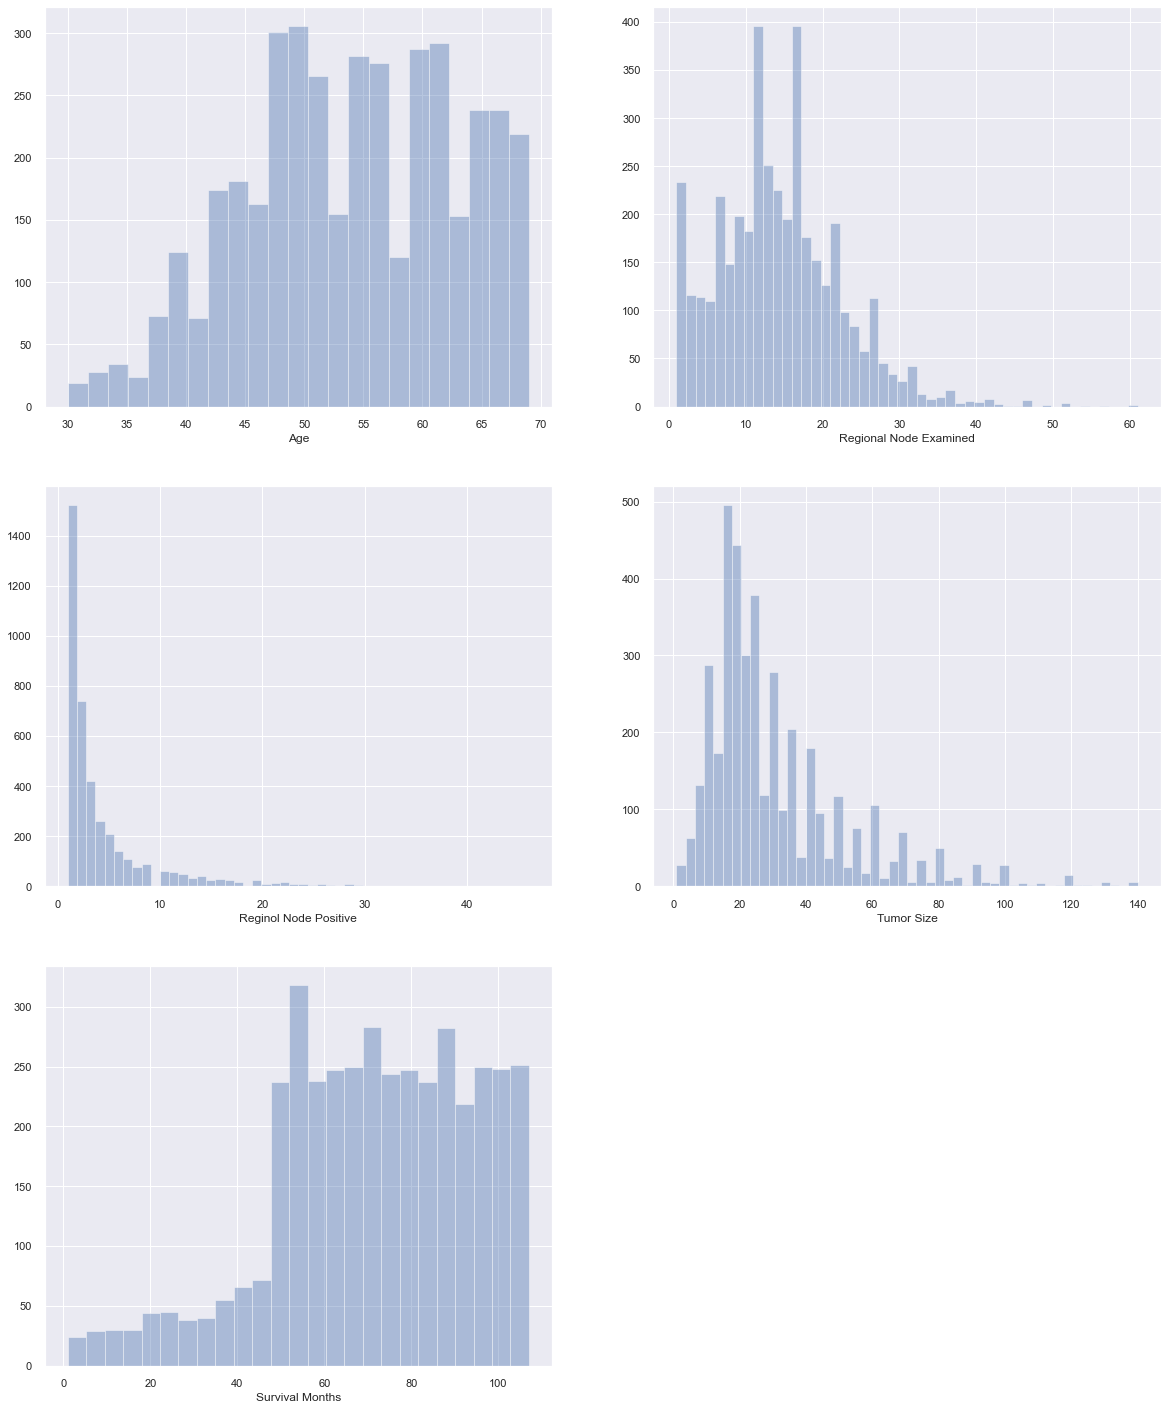

In [20]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df.Age, kde = False)

plt.subplot(3,2,2)
sns.distplot(df['Regional Node Examined'], kde = False)

plt.subplot(3,2,3)
sns.distplot(df['Reginol Node Positive'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['Tumor Size'] , kde = False)

plt.subplot(3,2,5)
sns.distplot(df['Survival Months'], kde = False)

# Bivariate Analysis

* Looking at our categorical variables comparing with our target variable I couldn't see a very different behavior.

* Looking at our target variable comparing with our explanatory variables we can see that Single people have a good difference compared to pairs when we look at people who will die or live, when we look at the Differentiate variable we can see that "Well Differentiated" people have a difference when comparing when the person will live or die, in the N Stage variable we can verify this difference also with the value of N3, looking at the 6th stage variable we can have a good insight, people with #A usually don't have big problems, unlike the person who have IIIC who generally have more problems with Brain Stroke than the other variable values.

<AxesSubplot:xlabel='Status', ylabel='count'>

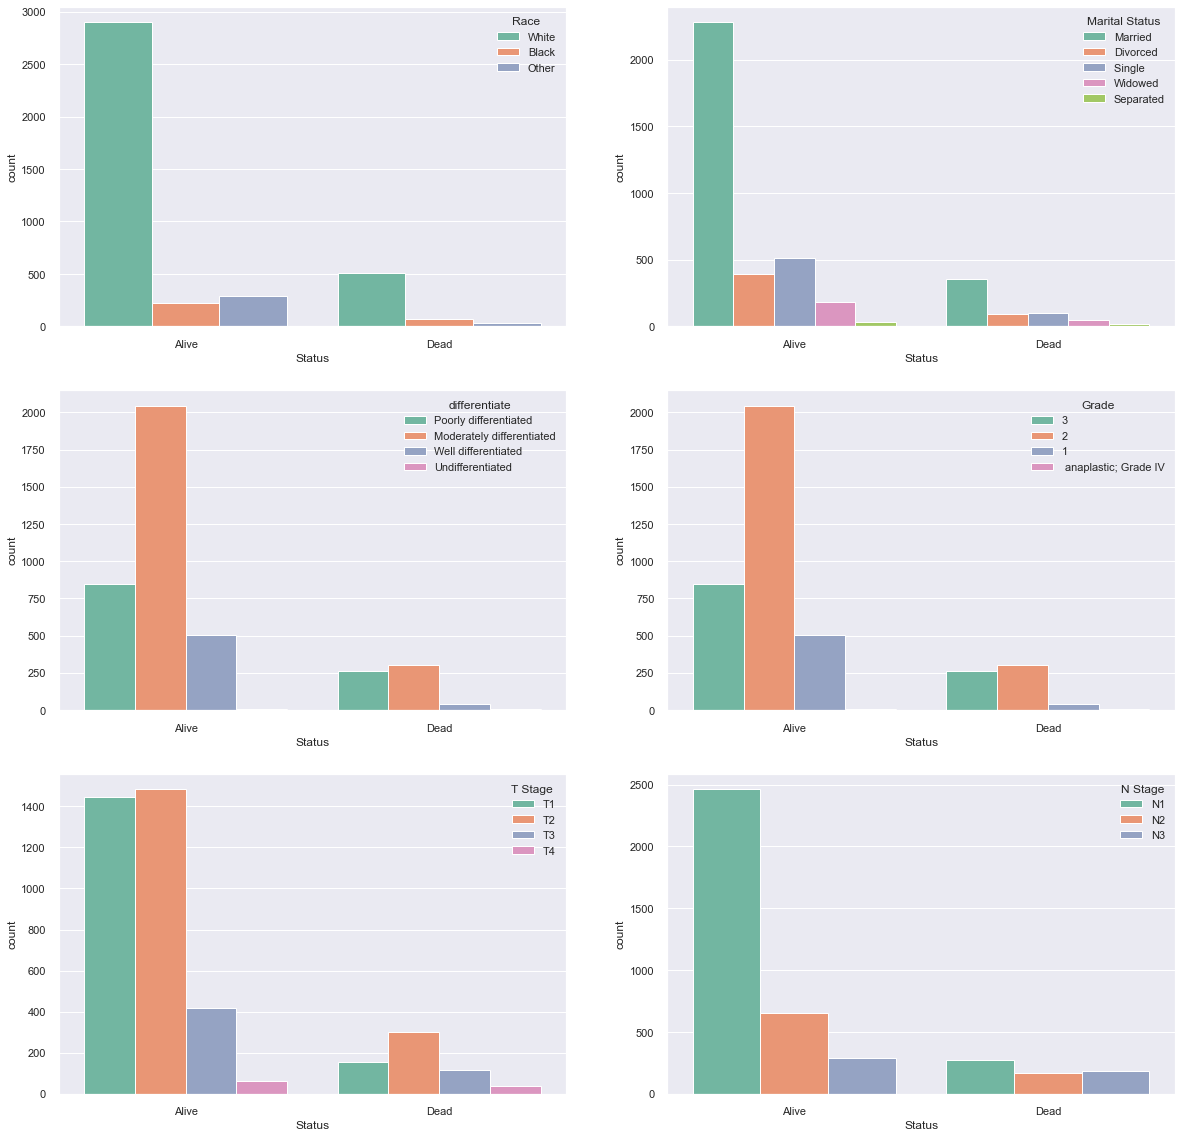

In [21]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = df)

<AxesSubplot:xlabel='Status', ylabel='count'>

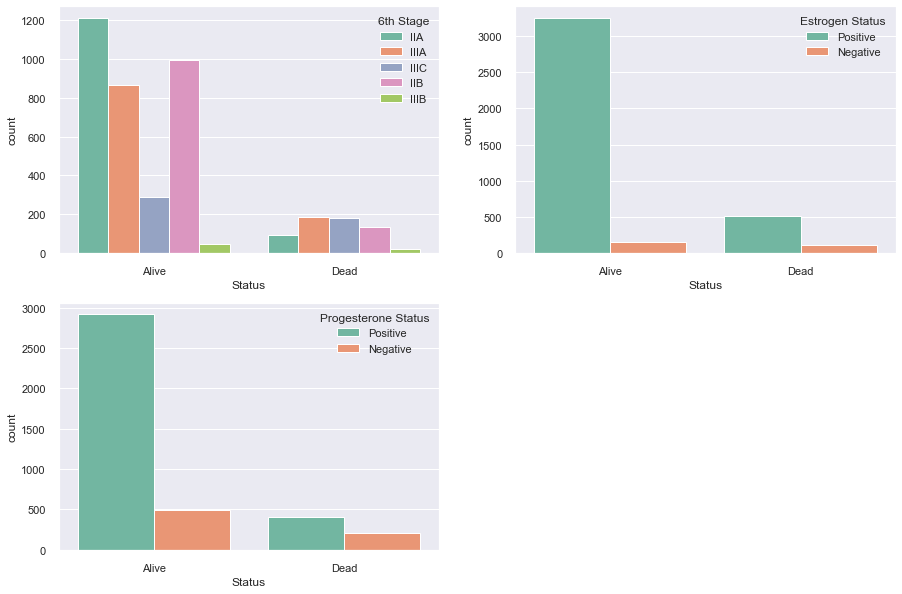

In [22]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Status', hue= '6th Stage', palette='Set2', data = df)

plt.subplot(2,2,2)
sns.countplot(x = 'Status', hue= 'Estrogen Status', palette='Set2', data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'Status', hue= 'Progesterone Status', palette='Set2', data = df)

* In the Age variable we can see that we do not have an age standard to influence the result.

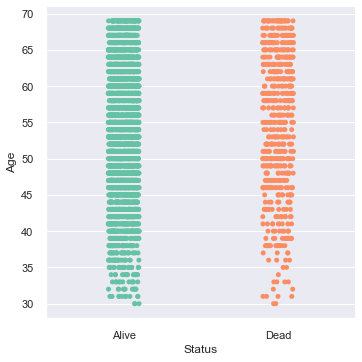

In [23]:
sns.catplot(x = "Status", y = "Age", palette = "Set2", data = df)

* Same thing for the Tumor Size variable, we don't have much difference when we look at our Target variable.

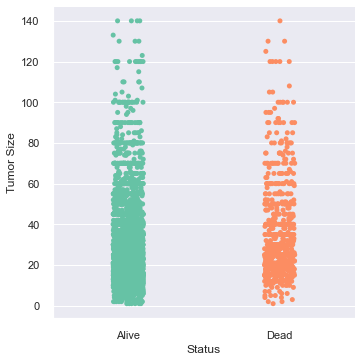

In [24]:
sns.catplot(x = "Status", y = "Tumor Size", palette = "Set2", data = df)

* This variable is interesting, we can see that people with higher levels are less likely to die.

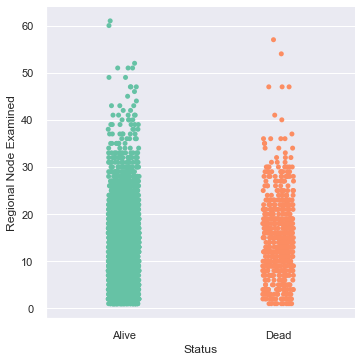

In [25]:
sns.catplot(x = "Status", y = "Regional Node Examined", palette = "Set2", data = df)

* The behavior is similar in both variables.

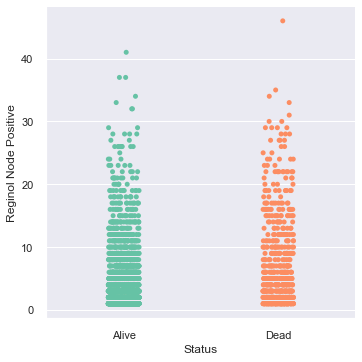

In [26]:
sns.catplot(x = "Status", y = "Reginol Node Positive", palette = "Set2", data = df)

* Here in this variable we can see that people with higher values in Survival Months are less likely to die.

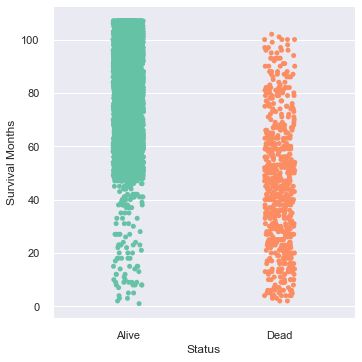

In [27]:
sns.catplot(x = "Status", y = "Survival Months", palette = "Set2", data = df)

* Comparing our Survival Months Variable with Age we can see the behavior seen above, the longer the Survival Months the less likely a person is to die, and when we look at the age variable we don't have much difference between death between adults and young people.

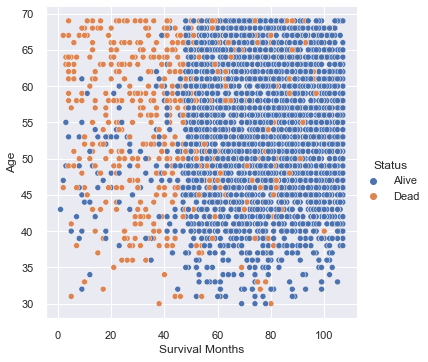

In [28]:
sns.relplot(x='Survival Months', y = 'Age', hue = "Status", data = df)

* Comparing our Survival Months Variable with Regional Node Positive we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Regionol node Positive variable we don't have much difference between death and life.

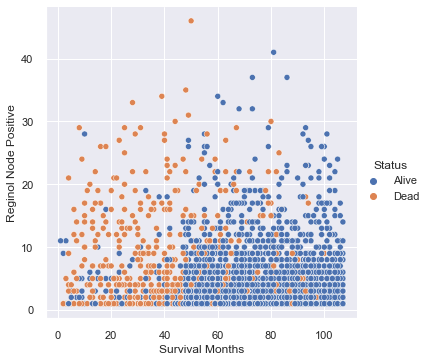

In [29]:
sns.relplot(x='Survival Months', y = 'Reginol Node Positive', hue = "Status", data = df)

* Comparing our Survival Months Variable with Regional Node Examined we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Regional node Examined variable we don't have much difference between death and life.

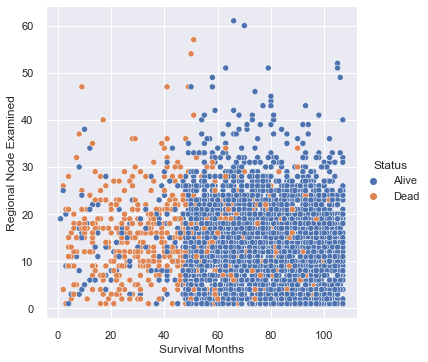

In [30]:
sns.relplot(x='Survival Months', y = 'Regional Node Examined', hue = "Status", data = df)

* Comparing our Survival Months Variable with TumorSize we can see the behavior seen before, the longer the Survival Months the less likely a person is to die, and when we look at the Tumor Size variable we don't have much difference between death and life.

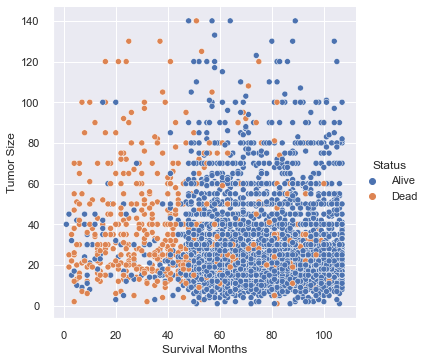

In [31]:
sns.relplot(x='Survival Months', y = 'Tumor Size', hue = "Status", data = df)

# Model Building:

* Separating into features variables and target variable.

In [32]:
X = df.iloc[:, 0:15].values

In [33]:
y = df.iloc[:, 15].values

# Balancing Classes:

* Analyzing the data we can see that we have a lot more data with Non Alive, so the models will learning more about this data than when the person Alive and can't learn about when this person will has Die, then we need to balance the classes and see what we can do with this data.

* Here we use the function OverSampling to balancing the classes, we are doing a Oversampling and both target variable will have the same number of samples.

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros = RandomOverSampler(random_state=0)

In [39]:
X, y = ros.fit_resample(X, y)

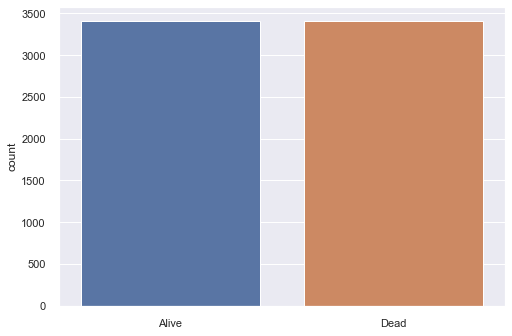

In [40]:
ax = sns.countplot(x=y)

# Label Encoder:

* Using LabelEncoder to transform categorical variables into continuous variables.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder_race = LabelEncoder()
label_encoder_marital_status = LabelEncoder()
label_encoder_t_stage = LabelEncoder()
label_encoder_n_stage = LabelEncoder()
label_encoder_6th_stage = LabelEncoder()
label_encoder_differentiate = LabelEncoder()
label_encoder_grade = LabelEncoder()
label_encoder_a_stage = LabelEncoder()
label_encoder_estrogene = LabelEncoder()
label_encoder_progesterone = LabelEncoder()
label_encoder_status = LabelEncoder()

In [43]:
X[:,1] = label_encoder_race.fit_transform(X[:,1])
X[:,2] = label_encoder_marital_status.fit_transform(X[:,2])
X[:,3] = label_encoder_t_stage.fit_transform(X[:,3])
X[:,4] = label_encoder_n_stage.fit_transform(X[:,4])
X[:,5] = label_encoder_6th_stage.fit_transform(X[:,5])
X[:,6] = label_encoder_differentiate.fit_transform(X[:,6])
X[:,7] = label_encoder_grade.fit_transform(X[:,7])
X[:,8] = label_encoder_a_stage.fit_transform(X[:,8])
X[:,10] = label_encoder_estrogene.fit_transform(X[:,10])
X[:,11] = label_encoder_progesterone.fit_transform(X[:,11])

In [44]:
y = label_encoder_status.fit_transform(y)

* We will run the models before scaling the data, after we will back here to run the StandardScaler and MinMax Scaler and verify if we have best results using the scaling.

StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [46]:
X_standard[0]

array([ 1.45824006,  0.41149362, -0.36929326, -1.10791306, -0.77864572,
       -1.17752694,  0.35847276,  1.19753098,  0.19021359, -1.28309198,
        0.34845591,  0.55927534,  1.14530028, -0.69966864, -0.02867572])

MinMax Scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
obj_norm = MinMaxScaler().fit(X)

In [49]:
X_normalization = obj_norm.transform(X)

In [50]:
X_normalization[0]

array([0.97435897, 1.        , 0.25      , 0.        , 0.        ,
       0.        , 0.33333333, 1.        , 1.        , 0.02158273,
       1.        , 1.        , 0.38333333, 0.        , 0.55660377])

* Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)

In [53]:
X_train.shape, y_train.shape

((4771, 15), (4771,))

In [54]:
X_test.shape, y_test.shape

((2045, 15), (2045,))

# Naive Bayes:

* Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data, StandardScaler Data and MinMax Data.

Running Gaussian Model.

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [57]:
previsoes = naive_bayes.predict(X_test)

In [58]:
confusao = confusion_matrix(y_test, previsoes)

Normal Data

0.7007334963325184

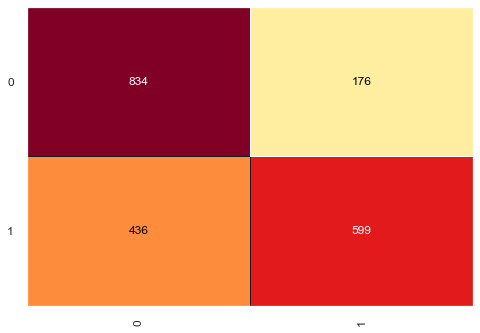

In [59]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [60]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [61]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1010
           1       0.77      0.58      0.66      1035

    accuracy                           0.70      2045
   macro avg       0.71      0.70      0.70      2045
weighted avg       0.72      0.70      0.70      2045



* Our model has learned to predict the outcome of when the person will not die but it has not learned to predict when the person will die, we do not have good accuracy and it is not a very good model.

In [62]:
score_naive_gaussian = 0.7007334963325184

StandardScaler

0.7007334963325184

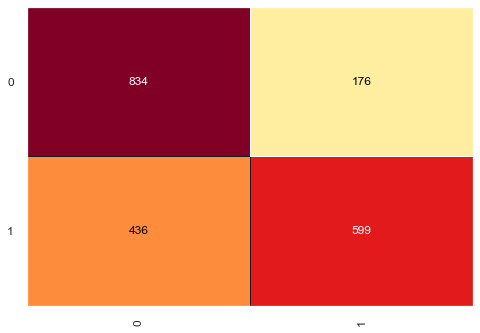

In [63]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [64]:
classification_naive_gaussian_standard = classification_report(y_test, previsoes)

In [65]:
print(classification_naive_gaussian_standard)

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1010
           1       0.77      0.58      0.66      1035

    accuracy                           0.70      2045
   macro avg       0.71      0.70      0.70      2045
weighted avg       0.72      0.70      0.70      2045



* We have the same result when we compare with Normal Data.

In [66]:
score_naive_gaussian_scaler = 0.7007334963325184

MinMax Scaler

0.7007334963325184

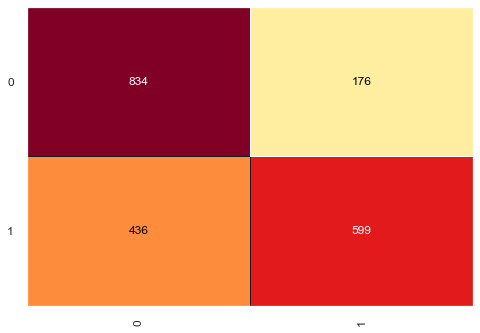

In [67]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [68]:
classification_naive_gaussian_minmax = classification_report(y_test, previsoes)

In [69]:
print(classification_naive_gaussian_minmax)

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1010
           1       0.77      0.58      0.66      1035

    accuracy                           0.70      2045
   macro avg       0.71      0.70      0.70      2045
weighted avg       0.72      0.70      0.70      2045



The model got much worse when compared to the other two models

In [70]:
score_naive_gaussian_minmax = 0.7

# Decision Tree:

Here we will use the Decision Tree Model, we will test Entropy and Gini calculations, using our Normal Data.

Running Entropy Calculation.

In [71]:
arvore_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3, random_state=0)

In [72]:
arvore_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [74]:
previsoes = arvore_entropy.predict(X_test)

Here we can see the tree and the decision rules.

Here we can see that it uses the Survival Months variable to make the first decision of the tree, we also have the 6th Stage variable as a death decision or not.

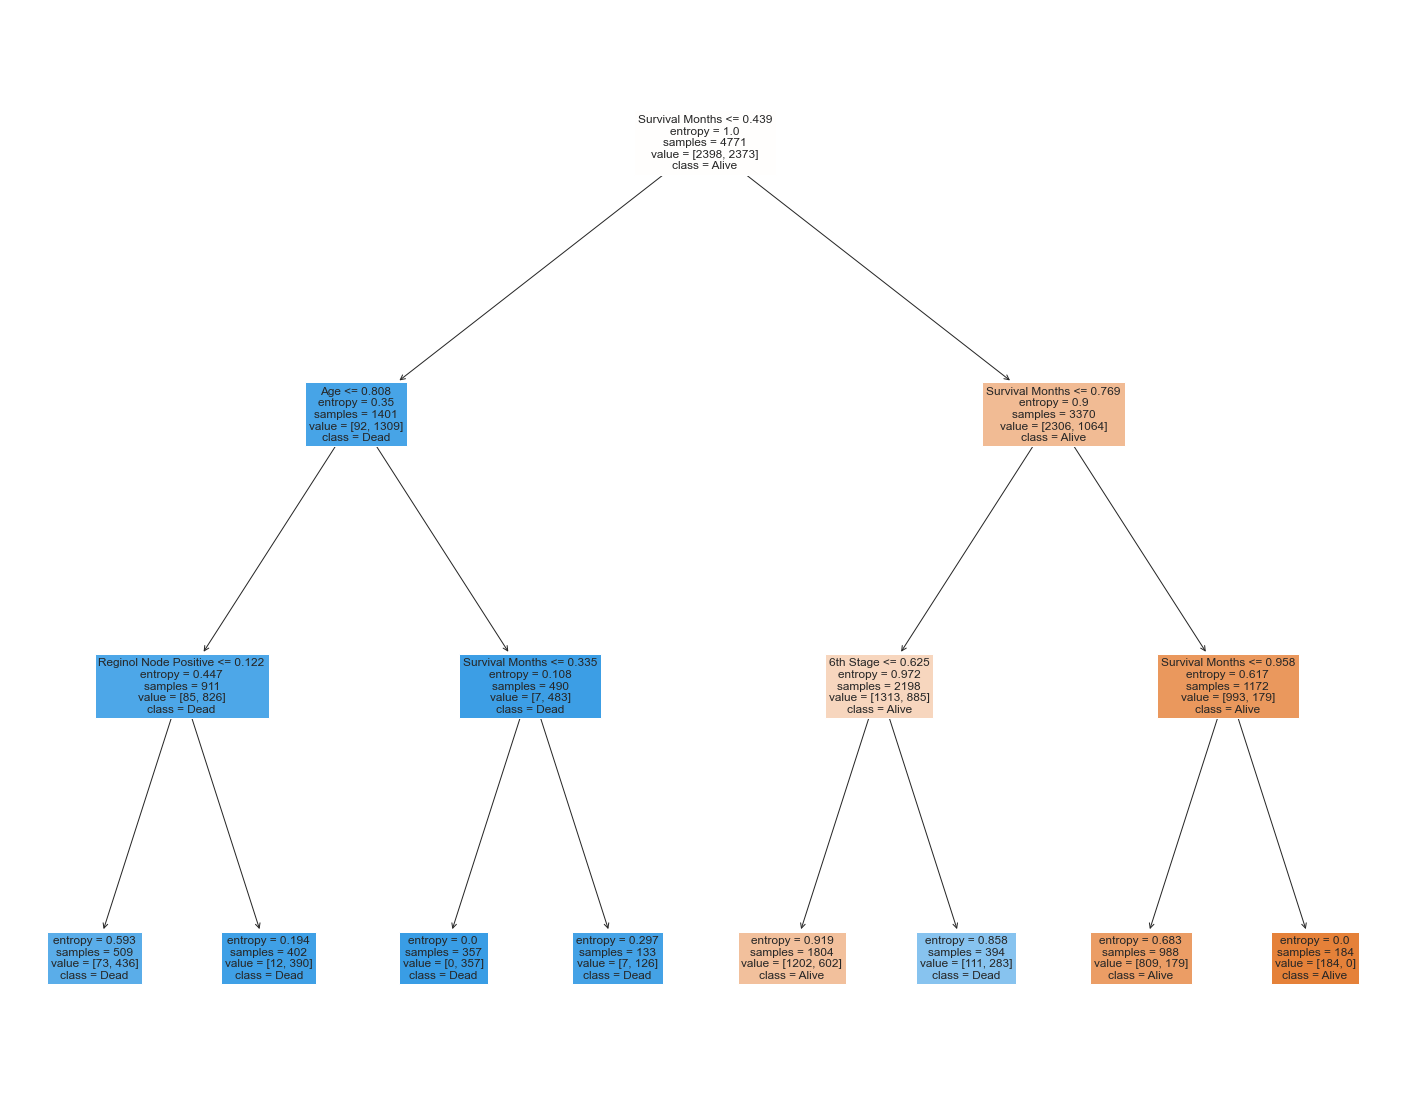

In [75]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_entropy, feature_names=df.columns[:-1], class_names=['Alive', 'Dead'], filled=True);

Normal Data

0.7867970660146699

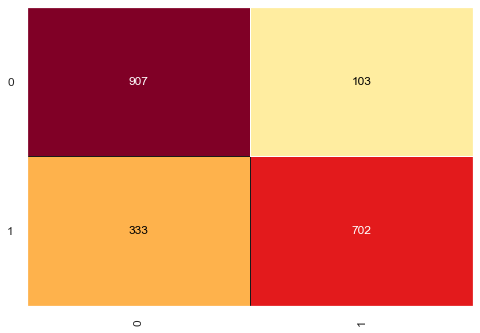

In [76]:
cm = ConfusionMatrix(arvore_entropy)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [77]:
classification_decision_entropy = (classification_report(y_test, previsoes))

In [78]:
print(classification_decision_entropy)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1010
           1       0.87      0.68      0.76      1035

    accuracy                           0.79      2045
   macro avg       0.80      0.79      0.78      2045
weighted avg       0.80      0.79      0.78      2045



* Our model is very good at predicting when a person will not die but it is not very good at predicting when a person will die, it is not a good model despite its accuracy.

In [79]:
score_tree_entropy = 0.7867970660146699

Checking the most important variables of the model.

In [80]:
columns = df.iloc[:, 0:15].columns

In [81]:
feature_imp = pd.Series(arvore_entropy.feature_importances_, index = columns).sort_values(ascending = False)

Here we can confirm what we saw earlier, the Survival Months variable is the main variable of the model.

In [83]:
feature_imp

Survival Months           0.881510
6th Stage                 0.084579
Age                       0.017358
Reginol Node Positive     0.016553
Race                      0.000000
Marital Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
dtype: float64

# Running Gini Calculation.

In [84]:
arvore_gini = DecisionTreeClassifier(max_depth= 3, random_state=0)

In [85]:
arvore_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [86]:
previsoes = arvore_gini.predict(X_test)

Here we can see the tree and the decision rules.

It uses the same variable as Entropy to make the decision but we have some differences in the tree.

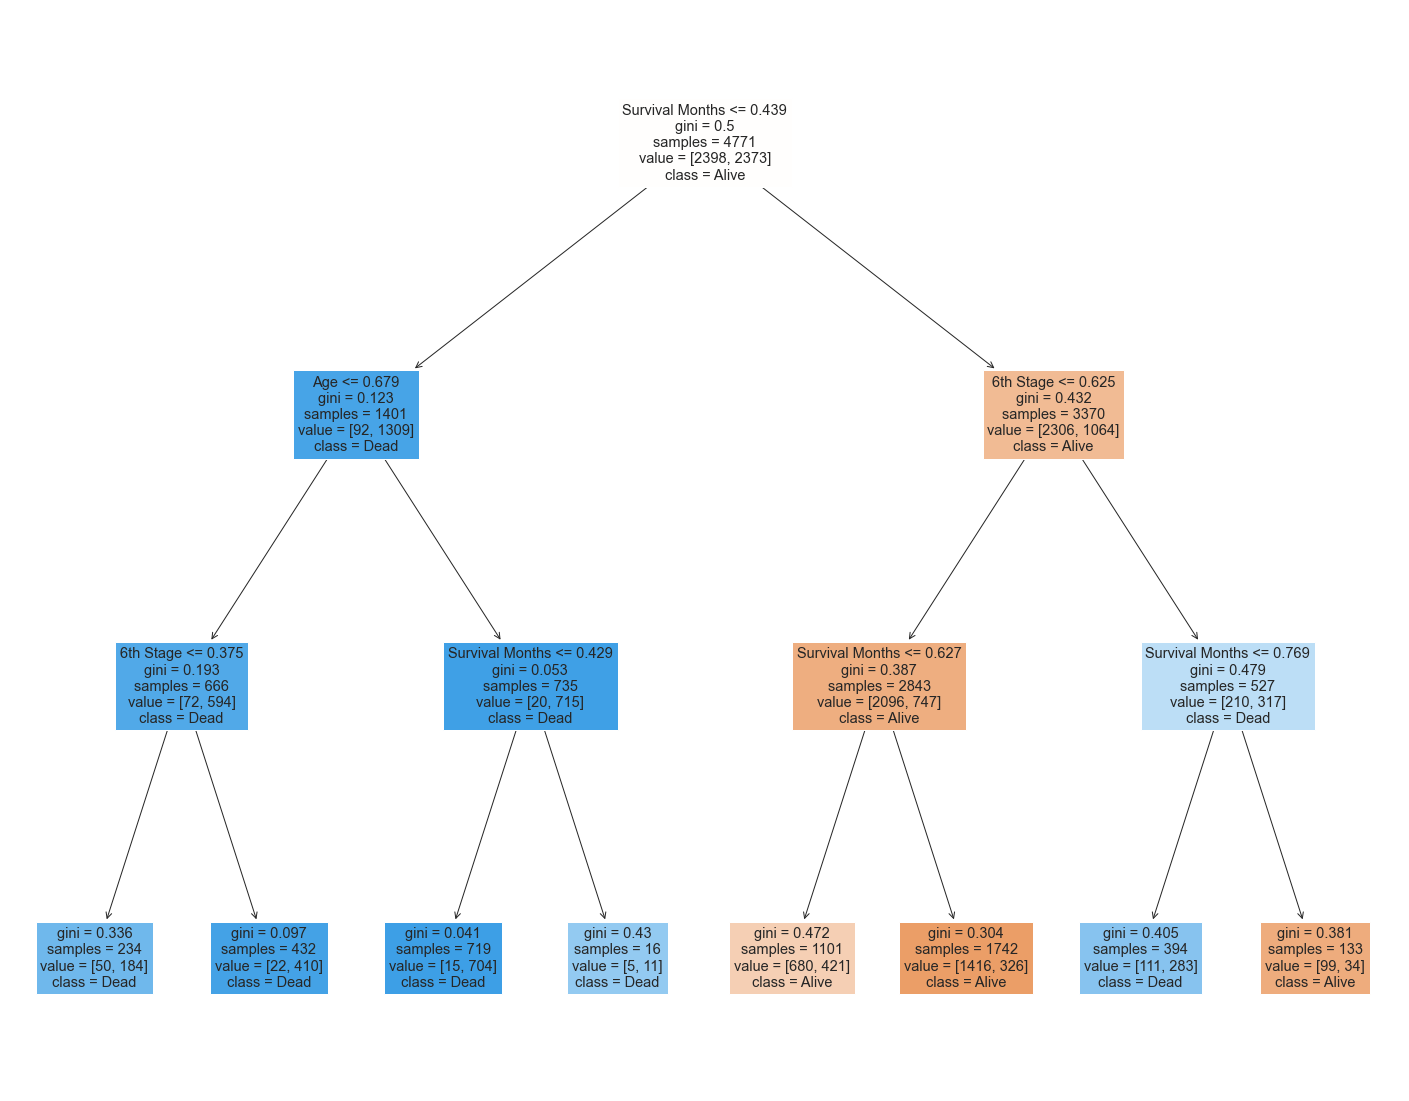

In [87]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(arvore_gini, feature_names=df.columns[:-1], class_names=['Alive', 'Dead'], filled=True);

Normal Data

0.7867970660146699

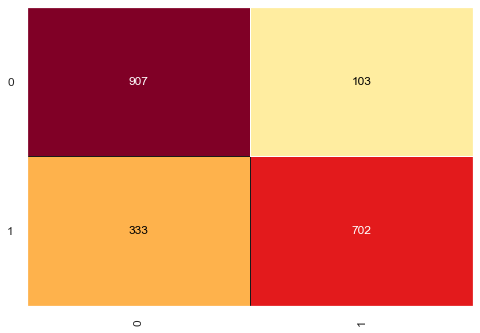

In [88]:
cm = ConfusionMatrix(arvore_gini)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [89]:
classification_decision_gini = (classification_report(y_test, previsoes))

In [90]:
print(classification_decision_gini)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1010
           1       0.87      0.68      0.76      1035

    accuracy                           0.79      2045
   macro avg       0.80      0.79      0.78      2045
weighted avg       0.80      0.79      0.78      2045



Here we had the same result when comparing with Entropy Model

In [91]:
score_tree_gini = 0.7867970660146699

Checking the most important variables of the model

In [92]:
feature_imp = pd.Series(arvore_gini.feature_importances_, index = columns).sort_values(ascending = False)

We have almost the same result when comparing with Entropy.

In [93]:
feature_imp

Survival Months           0.881637
6th Stage                 0.113642
Age                       0.004721
Race                      0.000000
Marital Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
Reginol Node Positive     0.000000
dtype: float64

# Random Forest:

Here we will use the Random Forest Model, we will test Entropy and Gini calculations, using our Normal Data.

Running Entropy Calculation.

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [96]:
previsoes = random_forest.predict(X_test)

Normal Data

0.7726161369193154

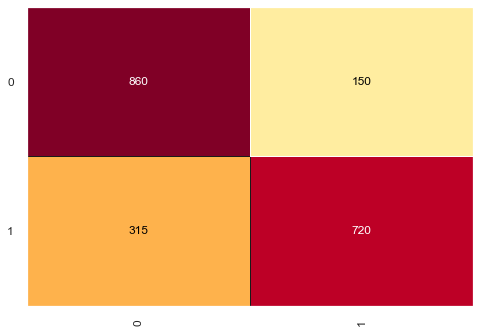

In [98]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [99]:
classification_random_entropy = (classification_report(y_test, previsoes))

In [100]:
print(classification_random_entropy)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1010
           1       0.83      0.70      0.76      1035

    accuracy                           0.77      2045
   macro avg       0.78      0.77      0.77      2045
weighted avg       0.78      0.77      0.77      2045



Here we see the same pattern as the Decision Tree model, it is good for predicting when a person will not die but it is not a good model for predicting when he will.

In [101]:
score_random_entropy = 0.7726161369193154

Checking the most important variables of the model

In [102]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

It is interesting to see here that the Survival Months variable is still the main variable but with a lower weight, here we have the 6th Stage variable as a variable to think about when making the decision.

In [103]:
feature_imp

Survival Months           0.486539
6th Stage                 0.130310
Reginol Node Positive     0.092221
N Stage                   0.081120
Grade                     0.051549
Estrogen Status           0.043167
Progesterone Status       0.032728
Tumor Size                0.029476
Age                       0.018386
T Stage                   0.011008
differentiate             0.010194
Regional Node Examined    0.007240
Race                      0.003538
Marital Status            0.001426
A Stage                   0.001100
dtype: float64

Running Gini Calculation.

In [104]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth= 3, random_state = 0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [105]:
previsoes = random_forest.predict(X_test)

Normal Data

0.7779951100244499

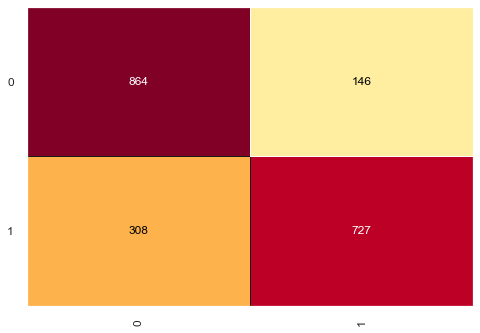

In [106]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [107]:
classification_random_gini_balanced = (classification_report(y_test, previsoes))

In [108]:
print(classification_random_gini_balanced)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1010
           1       0.83      0.70      0.76      1035

    accuracy                           0.78      2045
   macro avg       0.78      0.78      0.78      2045
weighted avg       0.79      0.78      0.78      2045



We had a small improvement when compared to the Entropy model but we still have the same problem.

In [109]:
score_random_gini = 0.7779951100244499

Checking the most important variables of the model

In [110]:
feature_imp = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

Its almost the same thing when we compare with Entropy.

In [111]:
feature_imp

Survival Months           0.484204
6th Stage                 0.135523
Reginol Node Positive     0.089076
N Stage                   0.081851
Grade                     0.053914
Estrogen Status           0.043711
Progesterone Status       0.032872
Tumor Size                0.028014
Age                       0.017555
T Stage                   0.010821
differentiate             0.009429
Regional Node Examined    0.007319
Race                      0.003966
Marital Status            0.001431
A Stage                   0.000314
dtype: float64

# K-Means:

Here we will use the K-Means Model, using our Normal Data, StandardScaler Data and MinMax Data, here we use the GridSearch Model to figure out the best metrics to use in this model.

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(metric = 'minkowski', p = 2)

Here we use the GridSearch to figure out the best metrics to use in this model.

In [114]:
k_list = list(range(1,31))

In [115]:
k_values = dict(n_neighbors = k_list)

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')

In [118]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [119]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.9226566564588892)

Running K-Means

In [120]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [121]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [122]:
previsoes = knn.predict(X_test)

0.9374083129584352

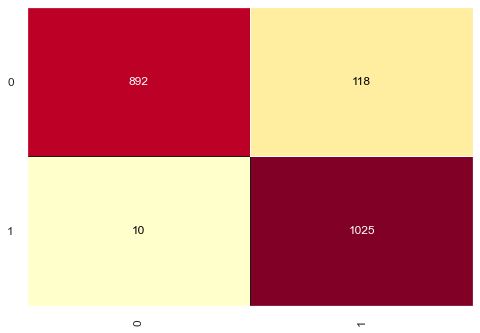

In [123]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [124]:
classification_knn = (classification_report(y_test, previsoes))

In [125]:
print(classification_knn)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1010
           1       0.90      0.99      0.94      1035

    accuracy                           0.94      2045
   macro avg       0.94      0.94      0.94      2045
weighted avg       0.94      0.94      0.94      2045



This model actually learned how to predict the two outcomes, but we can consider that the model was overfitted.

In [126]:
score_knn = 0.9374083129584352

StandardScaler

0.9374083129584352

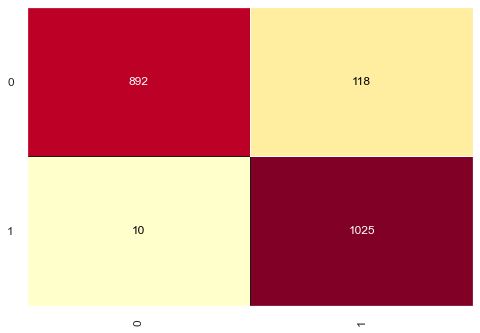

In [127]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [128]:
classification_knn_scaler = (classification_report(y_test, previsoes))

In [129]:
print(classification_knn_scaler)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1010
           1       0.90      0.99      0.94      1035

    accuracy                           0.94      2045
   macro avg       0.94      0.94      0.94      2045
weighted avg       0.94      0.94      0.94      2045



Here we have the same problem when compared to Normal Data, the model overfitted.

In [130]:
score_knn_scaler = 0.9374083129584352

MinMax Scaler

0.9374083129584352

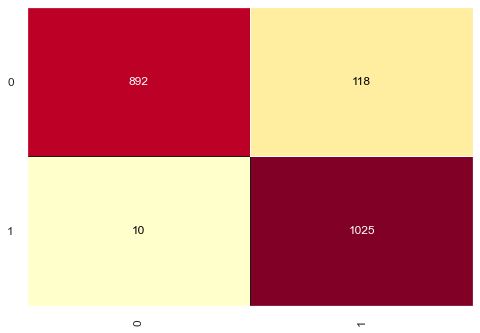

In [131]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [132]:
classification_knn_MinMax = (classification_report(y_test, previsoes))

In [133]:
print(classification_knn_MinMax)

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1010
           1       0.90      0.99      0.94      1035

    accuracy                           0.94      2045
   macro avg       0.94      0.94      0.94      2045
weighted avg       0.94      0.94      0.94      2045



Here we have the same problem when compared to Normal/StandardScaler Data, the model overfitted.

In [134]:
score_knn_minmax = 0.9374083129584352

# Logistic Regression:

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logistic = LogisticRegression(random_state = 1)

In [137]:
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [138]:
previsoes = logistic.predict(X_test)

Normal Data

0.7921760391198044

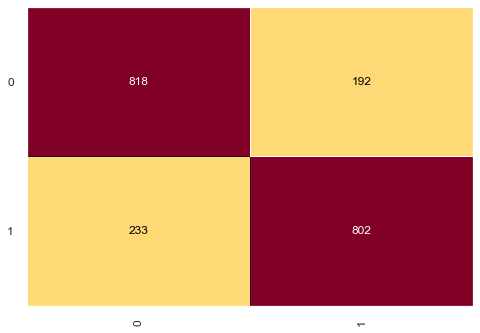

In [139]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [140]:
logistic_normal = classification_report(y_test, previsoes)

In [141]:
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1010
           1       0.81      0.77      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



The model can predict both outcomes, it's a good model to look at.

In [142]:
logistic_normal = 0.7921760391198044

StandardScaler

0.7921760391198044

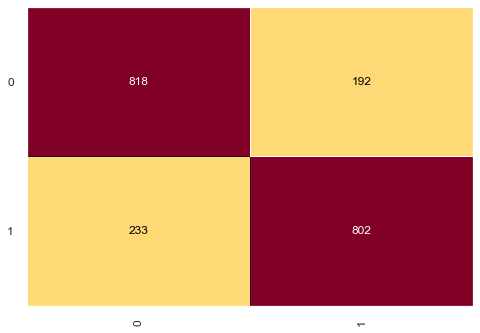

In [143]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [144]:
logistic_scaler = classification_report(y_test, previsoes)

In [145]:
print(logistic_scaler)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1010
           1       0.81      0.77      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



Its not too different when we compare with our Normal Data.

In [146]:
logistic_standard = 0.7921760391198044

MinMax Scaler

0.7921760391198044

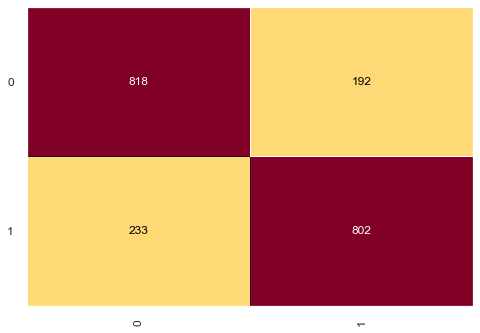

In [147]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [148]:
logistic_minmax = classification_report(y_test, previsoes)

In [149]:
print(logistic_minmax)

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1010
           1       0.81      0.77      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



The model is very similar to StandardScaler.

In [150]:
logistic_minmax = 0.7921760391198044

# SVM:

Here we will use the SVM Model, using our Normal Data, StandardScaler Data and MinMax Data, we will test Three Kernels (Linear, RBF and Poly).

In [151]:
from sklearn.svm import SVC

Running Linear Kernel.

In [152]:
svm = SVC(kernel = 'linear', random_state = 1, C = 1.0)

In [153]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [154]:
previsoes = svm.predict(X_test)

Normal Data

0.7926650366748166

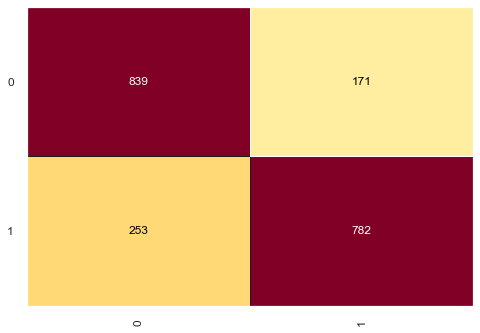

In [155]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [156]:
svm_linear = classification_report(y_test, previsoes)

In [157]:
print(svm_linear)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1010
           1       0.82      0.76      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



The model can predict both outcomes, it's a good model to look at.

In [158]:
score_svm_linear = 0.7926650366748166

StandardScaler

0.7926650366748166

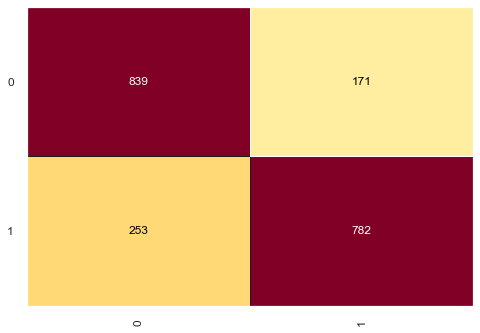

In [159]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [160]:
svm_linear_standard = classification_report(y_test, previsoes)

In [161]:
print(svm_linear_standard)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1010
           1       0.82      0.76      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



Its not too different when we compare with our Normal Data.

In [162]:
score_svm_linear_standard = 0.7902200488997555

MinMax Scaler

0.7926650366748166

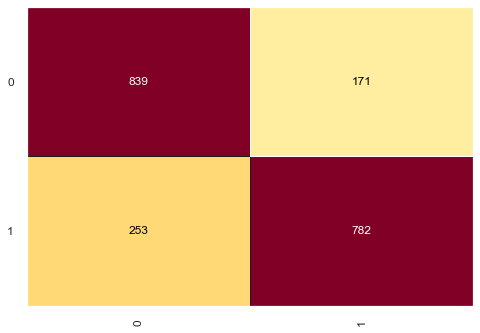

In [163]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [164]:
svm_linear_minmax = classification_report(y_test, previsoes)

In [165]:
print(svm_linear_minmax)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1010
           1       0.82      0.76      0.79      1035

    accuracy                           0.79      2045
   macro avg       0.79      0.79      0.79      2045
weighted avg       0.79      0.79      0.79      2045



In [166]:
score_svm_linear_minmax = 0.7926650366748166

Running RBF Kernel.

In [167]:
svm = SVC(kernel = 'rbf', random_state = 1, C = 1.0)

In [168]:
svm.fit(X_train, y_train)

SVC(random_state=1)

In [169]:
previsoes = svm.predict(X_test)

Normal Data

0.7975550122249389

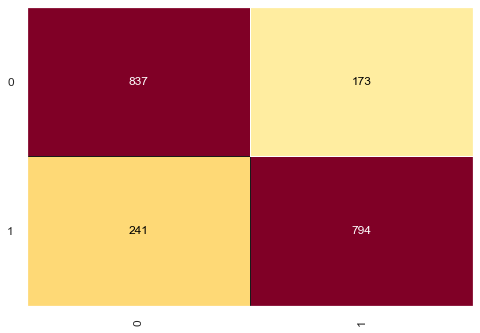

In [170]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [171]:
svm_rbf = classification_report(y_test, previsoes)

In [172]:
print(svm_rbf)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.79      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



When compared to the Linear model it is a little worse, but it is not bad, it is an average model.

In [173]:
score_svm_rbf = 0.7975550122249389

StandardScaler

0.7975550122249389

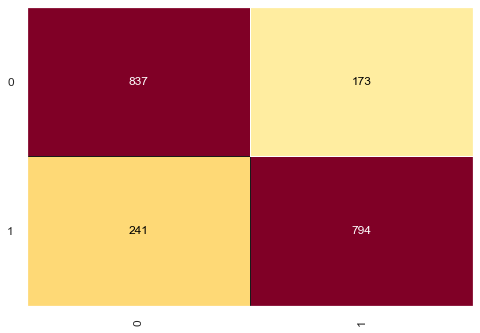

In [174]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [175]:
svm_rbf_standard = classification_report(y_test, previsoes)

In [176]:
print(svm_rbf_standard)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.79      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



We had a very considerable improvement compared to our normal data.

In [177]:
score_svm_rbf_standard = 0.7975550122249389

MinMax Scaler

0.7975550122249389

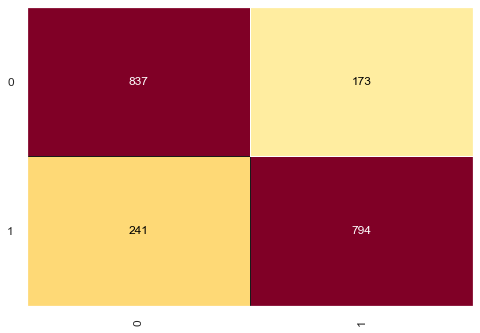

In [179]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [180]:
svm_rbf_minmax = classification_report(y_test, previsoes)

In [181]:
print(svm_rbf_minmax)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1010
           1       0.82      0.77      0.79      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



In [182]:
score_svm_rbf_minmax = 0.7975550122249389

Running Poly Kernel.

In [183]:
svm = SVC(kernel = 'poly', random_state = 1, C = 1.0)

In [184]:
svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=1)

In [185]:
previsoes = svm.predict(X_test)

Normal Data

0.8029339853300733

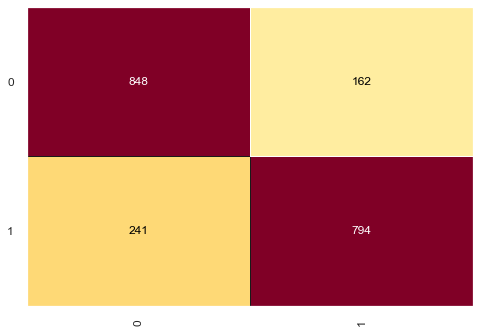

In [186]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [187]:
svm_poly = classification_report(y_test, previsoes)

In [188]:
print(svm_poly)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1010
           1       0.83      0.77      0.80      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



When compared to the other SVM models the model had a slight worsening in predicting when the person will not die, but it had a significant improvement in predicting when the person will die, it is a good model.

In [189]:
score_svm_poly = 0.8029339853300733

StandardScaler

0.8029339853300733

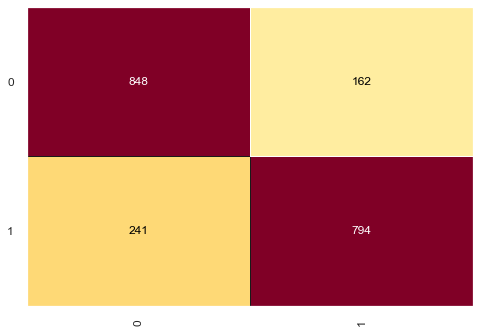

In [190]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [191]:
svm_poly_standard = classification_report(y_test, previsoes)

In [192]:
print(svm_poly_standard)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1010
           1       0.83      0.77      0.80      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



The model got worse enough to predict when the person will die or not.

In [193]:
score_svm_poly_standard = 0.8029339853300733

MinMax Scaler

0.8029339853300733

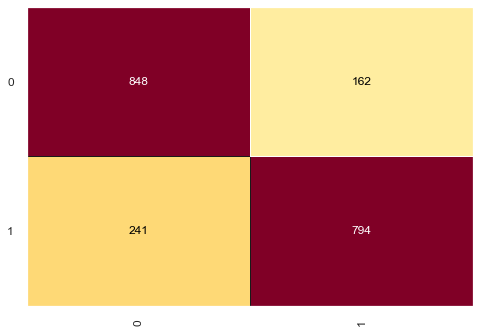

In [194]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [195]:
svm_poly_minmax = classification_report(y_test, previsoes)

In [196]:
print(svm_poly_minmax)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1010
           1       0.83      0.77      0.80      1035

    accuracy                           0.80      2045
   macro avg       0.80      0.80      0.80      2045
weighted avg       0.80      0.80      0.80      2045



We had a good improvement in the model when compared to the StandardScaler.

In [197]:
score_svm_poly_minmax = 0.8029339853300733

Checking the results

In [198]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Naive_dict_v2 = {'Model':'Naive Bayes',
               'Scaling':'Standard',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_scaler}

Naive_dict_v3 = {'Model':'Naive Bayes',
               'Scaling':'MinMax Scaler',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian_minmax}


In [199]:
resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                       'Naive_dict_v2':pd.Series(Naive_dict_v2),
                       'Naive_dict_v3':pd.Series(Naive_dict_v3),
                      })

In [200]:
Decision_dict_v1 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_tree_entropy}

Decision_dict_v2 = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_tree_gini}

Random_dict_v1 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Entropy',
               'Precision':score_random_entropy}

Random_dict_v2 = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type':'Gini',
               'Precision':score_random_gini}

In [201]:
resumo_random = pd.DataFrame({'Decision_dict_v1':pd.Series(Decision_dict_v1),
                       'Decision_dict_v2':pd.Series(Decision_dict_v2),
                        'Random_dict_v1':pd.Series(Random_dict_v1),
                        'Random_dict_v2':pd.Series(Random_dict_v2),
                      })

In [202]:
KNN_dict_v1 = {'Model':'KNN',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':score_knn}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn_scaler}

KNN_dict_v3 = {'Model':'KNN',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':score_knn_minmax}

In [203]:
resumo_knn = pd.DataFrame({'KNN_dict_v1':pd.Series(KNN_dict_v1),
                       'KNN_dict_v2':pd.Series(KNN_dict_v2),
                       'KNN_dict_v3':pd.Series(KNN_dict_v3)
                      })

In [204]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

Logistic_dict_v2 = {'Model':'Logistic Regression',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':logistic_standard}

Logistic_dict_v3 = {'Model':'Logistic Regression',
               'Scaling':'MinMax Scaler',
               'Type':'-',
               'Precision':logistic_minmax}

In [205]:
resumo_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1),
                       'Logistic_dict_v2':pd.Series(Logistic_dict_v2),
                       'Logistic_dict_v3':pd.Series(Logistic_dict_v3)
                      })

In [206]:
svm_dict_v1 = {'Model':'SVM',
               'Scaling':'Normal Data',
               'Type':'Linear',
               'Precision':score_svm_linear}

svm_dict_v2 = {'Model':'SVM',
               'Scaling':'Standard',
               'Type':'Linear',
               'Precision':score_svm_linear_standard}

svm_dict_v3 = {'Model':'SVM',
               'Scaling':'MinMax Scaler',
               'Type':'Linear',
               'Precision':score_svm_linear_minmax}

svm_dict_v4 = {'Model':'SVM',
               'Scaling':'Normal Data',
               'Type':'RBF',
               'Precision':score_svm_rbf}

svm_dict_v5 = {'Model':'SVM',
               'Scaling':'Standard',
               'Type':'RBF',
               'Precision':score_svm_rbf_standard}

svm_dict_v6 = {'Model':'SVM',
               'Scaling':'MinMax Scaler',
               'Type':'RBF',
               'Precision':score_svm_rbf_minmax}

svm_dict_v7 = {'Model':'SVM',
               'Scaling':'Normal Data',
               'Type':'Poly',
               'Precision':score_svm_poly}

svm_dict_v8 = {'Model':'SVM',
               'Scaling':'Standard',
               'Type':'Poly',
               'Precision':score_svm_poly_standard}

svm_dict_v9 = {'Model':'SVM',
               'Scaling':'MinMax Scaler',
               'Type':'Poly',
               'Precision':score_svm_poly_minmax}

In [207]:
resumo_svm = pd.DataFrame({'svm_dict_v1':pd.Series(svm_dict_v1),
                       'svm_dict_v2':pd.Series(svm_dict_v2),
                       'svm_dict_v3':pd.Series(svm_dict_v3),
                       'svm_dict_v4':pd.Series(svm_dict_v4),
                       'svm_dict_v5':pd.Series(svm_dict_v5),
                       'svm_dict_v6':pd.Series(svm_dict_v6),
                       'svm_dict_v7':pd.Series(svm_dict_v7),
                       'svm_dict_v8':pd.Series(svm_dict_v8),
                       'svm_dict_v9':pd.Series(svm_dict_v9),
                      })

In [208]:
resumo

,Naive_dict_v1,Naive_dict_v2,Naive_dict_v3
Model,Naive Bayes,Naive Bayes,Naive Bayes
Scaling,Normal Data,Standard,MinMax Scaler
Type,Gaussian,Gaussian,Gaussian
Precision,0.700733,0.700733,0.7


In [209]:
resumo_random

,Decision_dict_v1,Decision_dict_v2,Random_dict_v1,Random_dict_v2
Model,Decision Tree,Decision Tree,Random Forest,Random Forest
Scaling,Normal Data,Normal Data,Normal Data,Normal Data
Type,Entropy,Gini,Entropy,Gini
Precision,0.786797,0.786797,0.772616,0.777995


In [211]:
resumo_knn

,KNN_dict_v1,KNN_dict_v2,KNN_dict_v3
Model,KNN,KNN,KNN
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.937408,0.937408,0.937408


In [212]:
resumo_logistic

,Logistic_dict_v1,Logistic_dict_v2,Logistic_dict_v3
Model,Logistic Regression,Logistic Regression,Logistic Regression
Scaling,Normal Data,Standard,MinMax Scaler
Type,-,-,-
Precision,0.792176,0.792176,0.792176


In [213]:
resumo_svm

,svm_dict_v1,svm_dict_v2,svm_dict_v3,svm_dict_v4,svm_dict_v5,svm_dict_v6,svm_dict_v7,svm_dict_v8,svm_dict_v9
Model,SVM,SVM,SVM,SVM,SVM,SVM,SVM,SVM,SVM
Scaling,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler,Normal Data,Standard,MinMax Scaler
Type,Linear,Linear,Linear,RBF,RBF,RBF,Poly,Poly,Poly
Precision,0.792665,0.79022,0.792665,0.797555,0.797555,0.797555,0.802934,0.802934,0.802934


# Conclusion:

We can see that we have numeric variables and some categorical variables, in our Data Visualization we can get some good insights.

In our data analysis we can already see that people with higher Survival Months value are less likely to die from BrainStroke, this is already a self-explanatory variable, maybe if we take it out of the model we can make the challenge better, we can also see that our target variable is balanced, so we had to use an OverSampling to equalize our target class and be able to run Machine Learning models, without balancing the models learn a lot when the person is not going to die and can't predict when the person will (which is the goal).

When we look at the most important variables in the Decision Tree and Random Forest, we can see that it is the Survival Months variable, which makes sense with what we observed in our data analysis, it is also interesting that in the Random Forest model he chose the 6th Stage variable.

When we look at our Machine Learning models, we have good models and some not so good models, some of the models can only predict when the person is not going to die, in our KNN model we had great accuracy but ended up overfitting,

Our two best models are the Logistic Regression models (Normal Data, StandardScaler and MinMax Scaler), these are the two best models to use.